<a href="https://colab.research.google.com/github/Sriharan-Thirumurthi/Kovai.co-assessment/blob/main/Kovai_co_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df=pd.read_csv('/content/drive/MyDrive/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv')
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c291853c77fc2dc2b7373802aba7ccae7f6a35f72af66c640682050e12d7cbed
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [29]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

<ipython-input-29-c104683c7198>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2024-08-30,16436,10705,225,19026,3925,59.0
1,2023-09-15,15499,10671,267,18421,4519,61.0
2,2021-12-28,1756,2352,0,3775,0,13.0
3,2023-01-11,10536,8347,223,14072,0,48.0
4,2021-09-11,820,612,0,1283,0,11.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB


In [ ]:
df.sort_values(by='Date', inplace=True)

df.fillna(method='ffill', inplace=True)

df.head()
df.isnull().sum()

<ipython-input-15-d0c47b7037c6>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,7


In [31]:
# prompt: create an entity column 'month'
df['month'] = df['Date'].dt.month
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,month
0,2024-08-30,16436,10705,225,19026,3925,59.0,8
1,2023-09-15,15499,10671,267,18421,4519,61.0,9
2,2021-12-28,1756,2352,0,3775,0,13.0,12
3,2023-01-11,10536,8347,223,14072,0,48.0,1
4,2021-09-11,820,612,0,1283,0,11.0,9


In [33]:
df = df.sort_values(by='Date', ascending=True)
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,month
1013,2019-07-01,15987,9962,407,21223,3715,NaN,7
1120,2019-07-02,16895,10656,409,21715,3993,NaN,7
1451,2019-07-03,16613,10658,427,22025,3638,NaN,7
1171,2019-07-04,16604,10445,437,21868,3576,NaN,7
1523,2019-07-05,16040,10532,400,20697,2856,NaN,7


/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/plot.py:842: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby([entity_column, "__bins"])[sortbykey].count()
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/plot.py:844: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.reset_index()


<Axes: xlabel='Time'>

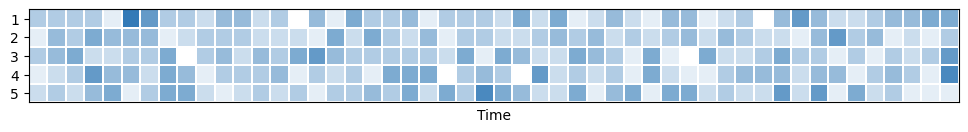

In [35]:
from ydata_profiling import ProfileReport
from ydata_profiling.visualisation.plot import timeseries_heatmap
timeseries_heatmap(df,entity_column='month')

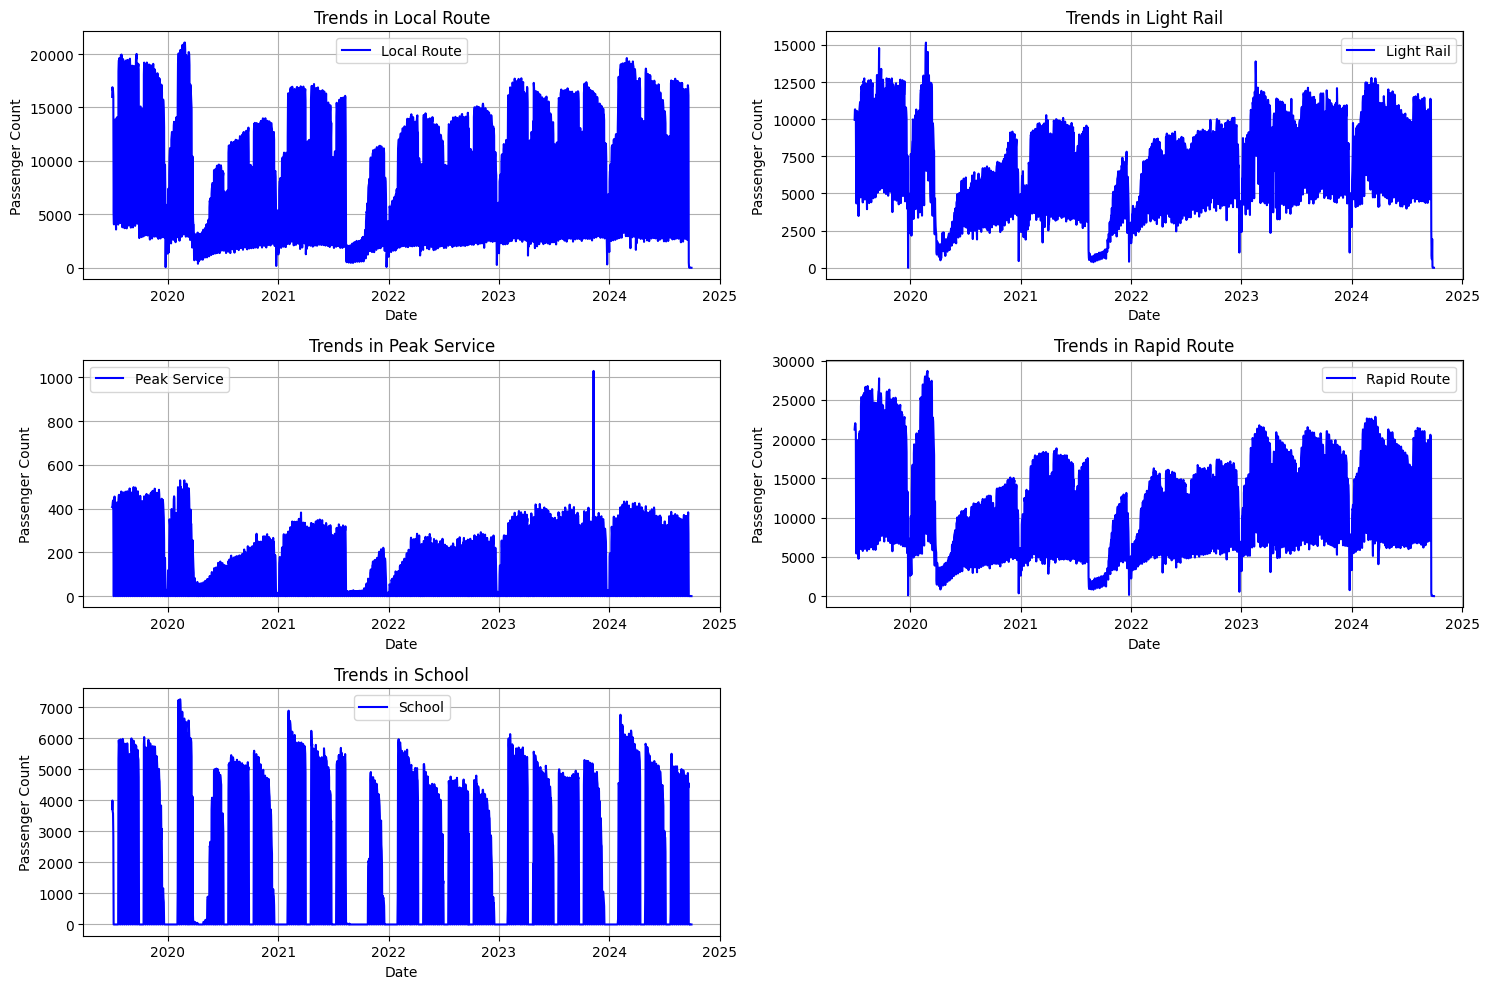

In [36]:
fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
plt.figure(figsize=(15, 10))

df.set_index('Date', inplace=True)
for i, field in enumerate(fields, 1):
    plt.subplot(3, 2, i)  # Arrange in a grid: 3 rows, 2 columns
    plt.plot(df.index, df[field], label=field, color='blue')
    plt.title(f'Trends in {field}')
    plt.xlabel('Date')
    plt.ylabel('Passenger Count')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [40]:
!pip install prophet

In [44]:
from prophet import Prophet
df = df.reset_index()
local_route = df[['Date', 'Local Route']]
local_route.columns = ['ds', 'y']
model = Prophet()
model.fit(local_route)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/6w5fpub3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/u2wc2gku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57663', 'data', 'file=/tmp/tmpnd46qwmg/6w5fpub3.json', 'init=/tmp/tmpnd46qwmg/u2wc2gku.json', 'output', 'file=/tmp/tmpnd46qwmg/prophet_modelr5wy18o2/prophet_model-20241128045626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:56:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:56:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

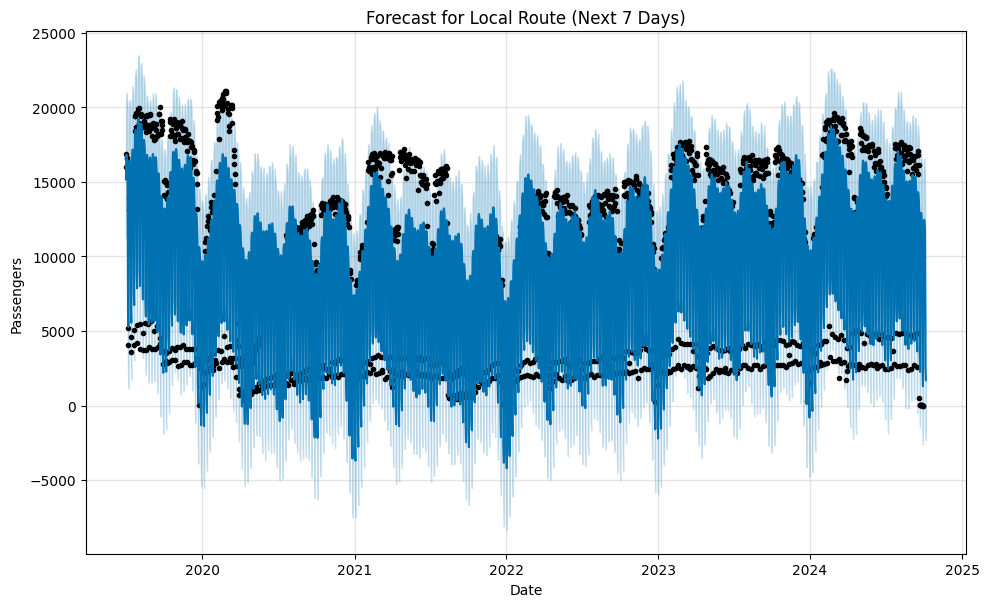

In [47]:
fig = model.plot(forecast)
plt.title("Forecast for Local Route (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()

In [48]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

             ds          yhat   yhat_lower    yhat_upper
1915 2024-09-27  11804.037120  7857.908398  15612.052536
1916 2024-09-28   2438.599586 -1586.067214   6671.767655
1917 2024-09-29   1294.421129 -2607.392114   5229.773928
1918 2024-09-30  10495.099677  6409.971010  14543.073071
1919 2024-10-01  12290.212671  8278.110360  16078.766344
1920 2024-10-02  12454.564899  8779.456828  16533.938867
1921 2024-10-03  12304.106031  8426.715166  15995.696894
1922 2024-10-04  11774.630519  7811.960187  15473.159620
1923 2024-10-05   2626.683795 -1459.072216   6602.719598
1924 2024-10-06   1701.722160 -2345.283334   6046.488598


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/asers6g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/w7gltnfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24794', 'data', 'file=/tmp/tmpnd46qwmg/asers6g1.json', 'init=/tmp/tmpnd46qwmg/w7gltnfs.json', 'output', 'file=/tmp/tmpnd46qwmg/prophet_modeloxxlja09/prophet_model-20241128051436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:14:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


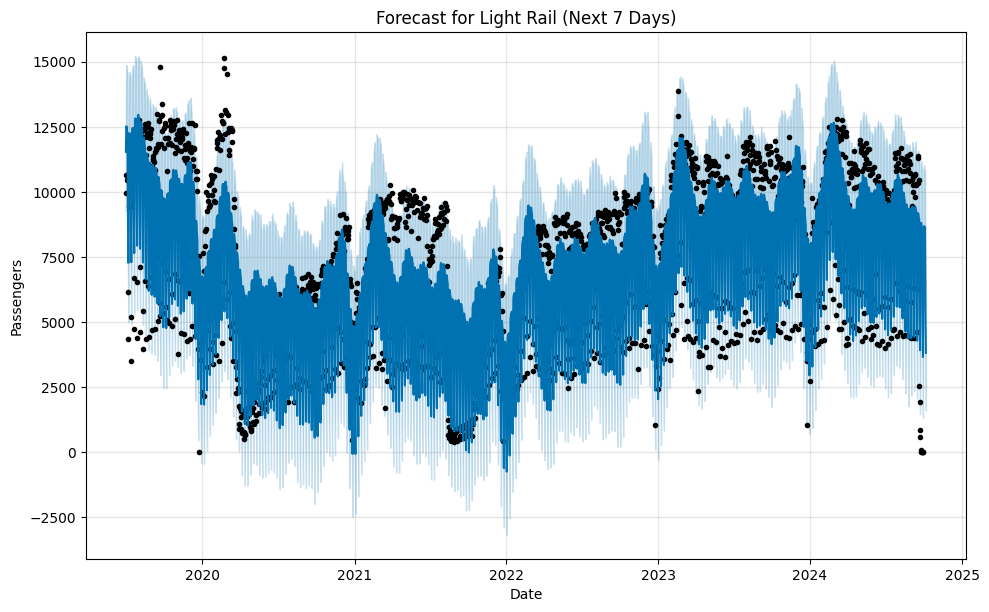

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/jzt1xdfm.json



Forecast for Light Rail (Next 7 Days):
             ds         yhat   yhat_lower    yhat_upper
1918 2024-09-30  7583.443077  5302.507919   9930.473330
1919 2024-10-01  8637.506094  6433.543097  11010.160100
1920 2024-10-02  8680.287395  6419.786422  10969.076510
1921 2024-10-03  8599.768342  6237.408947  10823.254959
1922 2024-10-04  8629.938528  6199.864959  10864.414727
1923 2024-10-05  5166.143206  2847.178667   7487.119341
1924 2024-10-06  3808.671451  1589.676671   6052.413061


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/16zy1u19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79746', 'data', 'file=/tmp/tmpnd46qwmg/jzt1xdfm.json', 'init=/tmp/tmpnd46qwmg/16zy1u19.json', 'output', 'file=/tmp/tmpnd46qwmg/prophet_modelboi6ffok/prophet_model-20241128051438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:14:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


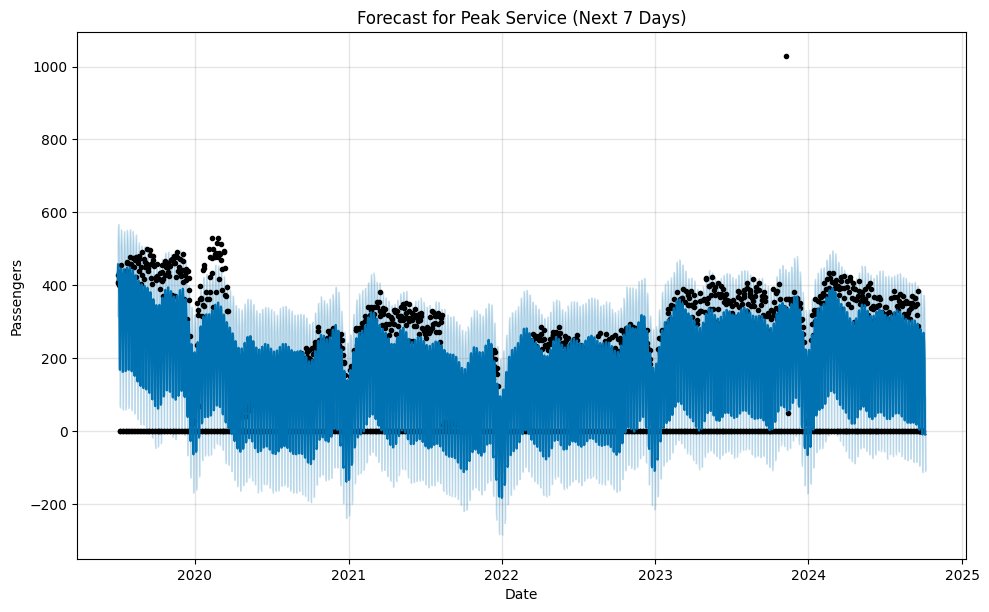

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/cwz0p72p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/r5t0399z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97683', 'data', 'file=/tmp/tmpnd46qwmg/cwz0p72p.json', 'init=/tmp/tmpnd46qwmg/r5t0399z.json', 'output', 'file=/tmp/tmpnd46qwmg/prophet_modelzypmumy5/prophet_model-20241128051439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']



Forecast for Peak Service (Next 7 Days):
             ds        yhat  yhat_lower  yhat_upper
1918 2024-09-30  223.811426  120.163398  324.080970
1919 2024-10-01  269.251305  163.886630  372.502086
1920 2024-10-02  269.020228  165.597987  373.334550
1921 2024-10-03  242.469110  145.648016  348.104647
1922 2024-10-04  190.810618   88.482784  293.054013
1923 2024-10-05  -11.079756 -110.725347   98.522168
1924 2024-10-06   -9.691342 -105.556627   94.735325


05:14:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


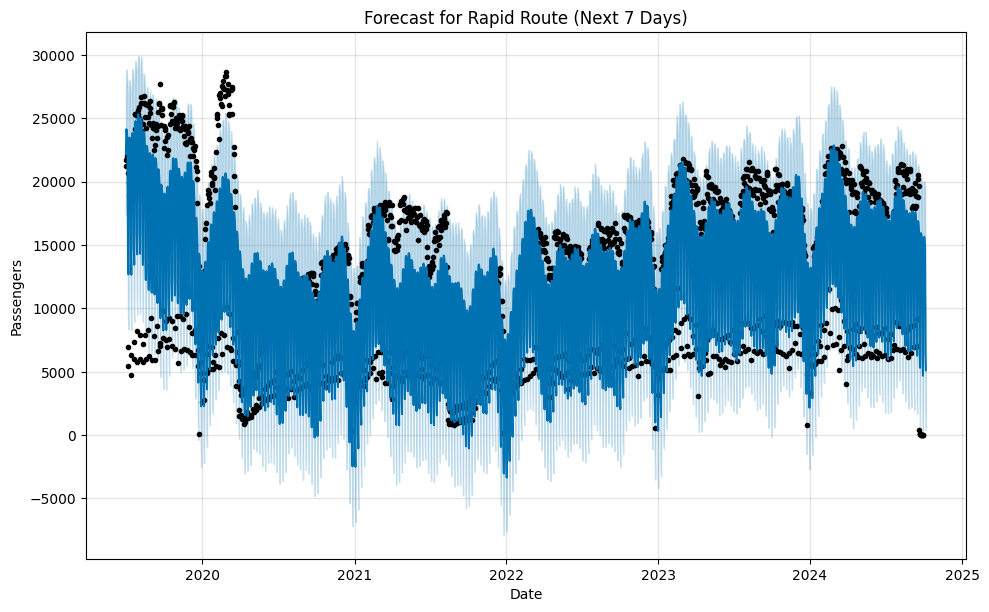

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/pq16yhx4.json



Forecast for Rapid Route (Next 7 Days):
             ds          yhat    yhat_lower    yhat_upper
1918 2024-09-30  13451.439464   8543.055543  17832.336240
1919 2024-10-01  15558.779105  10666.631248  19958.243536
1920 2024-10-02  15645.997454  10801.079402  20076.339362
1921 2024-10-03  15456.805596  10472.599348  19984.731624
1922 2024-10-04  14750.267918  10201.046738  19426.778893
1923 2024-10-05   6564.267773   2005.072044  10909.561162
1924 2024-10-06   5115.324841    415.249128   9747.117590


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd46qwmg/5groxcvz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14211', 'data', 'file=/tmp/tmpnd46qwmg/pq16yhx4.json', 'init=/tmp/tmpnd46qwmg/5groxcvz.json', 'output', 'file=/tmp/tmpnd46qwmg/prophet_model4ndle50c/prophet_model-20241128051441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:14:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


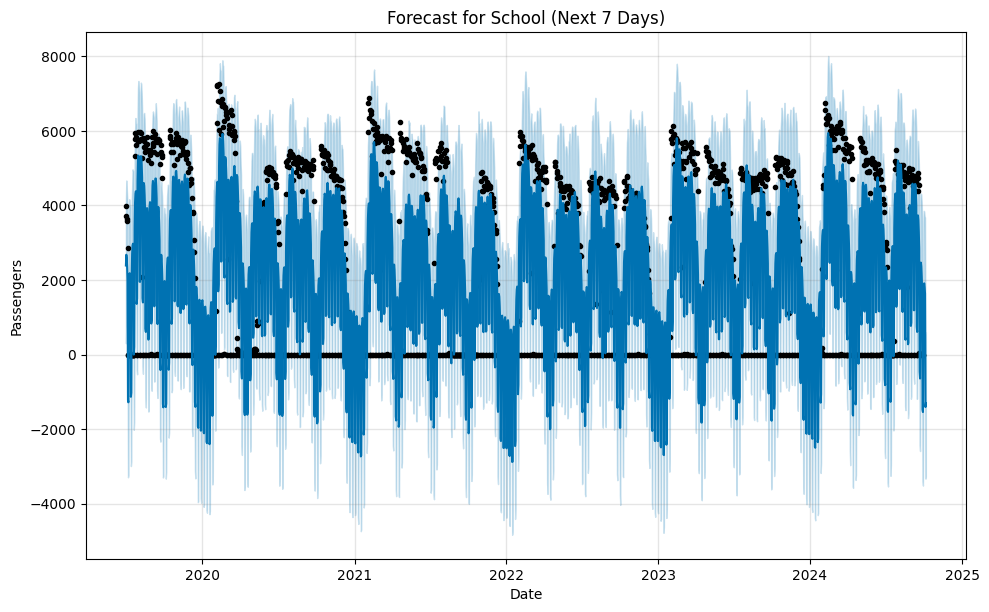


Forecast for School (Next 7 Days):
             ds         yhat   yhat_lower   yhat_upper
1918 2024-09-30  1424.605397  -396.311528  3256.272672
1919 2024-10-01  1848.711346    -2.984957  3855.576649
1920 2024-10-02  1909.190565    13.571248  3839.260023
1921 2024-10-03  1811.524961    32.740207  3713.444556
1922 2024-10-04  1629.324184  -342.087088  3677.864161
1923 2024-10-05 -1410.416213 -3331.225222   526.647878
1924 2024-10-06 -1301.995643 -3275.474711   598.686867


In [50]:


# this function is to print the forecast using prophet for the next 7 days by passing the column names to the function
def forecast_column(df, column_name, periods=7):
    data = df[['Date', column_name]].copy()
    data.columns = ['ds', 'y']


    model = Prophet()
    model.fit(data)

    future = model.make_future_dataframe(periods=periods)

    # Forecasting the model
    forecast = model.predict(future)
    fig = model.plot(forecast)
    plt.title(f"Forecast for {column_name} (Next {periods} Days)")
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.grid(True)
    plt.show()

    # next 7 days prediction
    print(f"\nForecast for {column_name} (Next {periods} Days):")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods))

columns = ['Light Rail', 'Peak Service', 'Rapid Route', 'School']
for column in columns:
    forecast_column(df, column_name=column, periods=7)


<Axes: xlabel='month', ylabel='Local Route'>

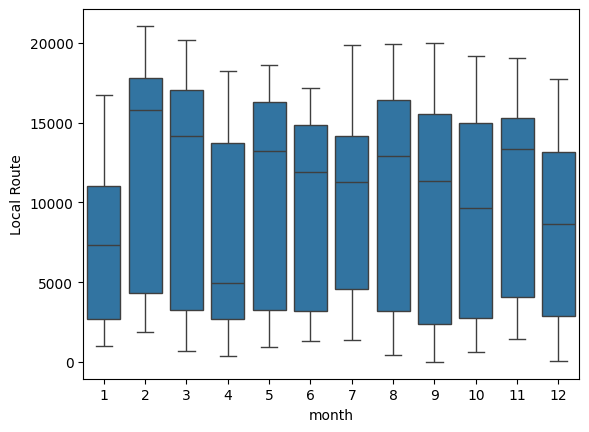

In [51]:
sns.boxplot(data=df,x='month',y='Local Route')

In [55]:
df['day_of_week'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['year'] = df['Date'].dt.year
df['hour'] = df['Date'].dt.hour
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,month,day_of_week,quarter,year,hour
0,2019-07-01,15987,9962,407,21223,3715,NaN,7,0,3,2019,0
1,2019-07-02,16895,10656,409,21715,3993,NaN,7,1,3,2019,0
2,2019-07-03,16613,10658,427,22025,3638,NaN,7,2,3,2019,0
3,2019-07-04,16604,10445,437,21868,3576,NaN,7,3,3,2019,0
4,2019-07-05,16040,10532,400,20697,2856,NaN,7,4,3,2019,0


<Axes: xlabel='day_of_week', ylabel='Local Route'>

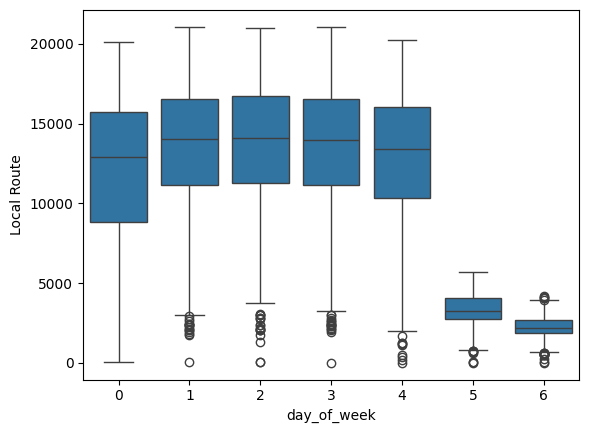

In [53]:
sns.boxplot(data=df,x='day_of_week',y='Local Route')

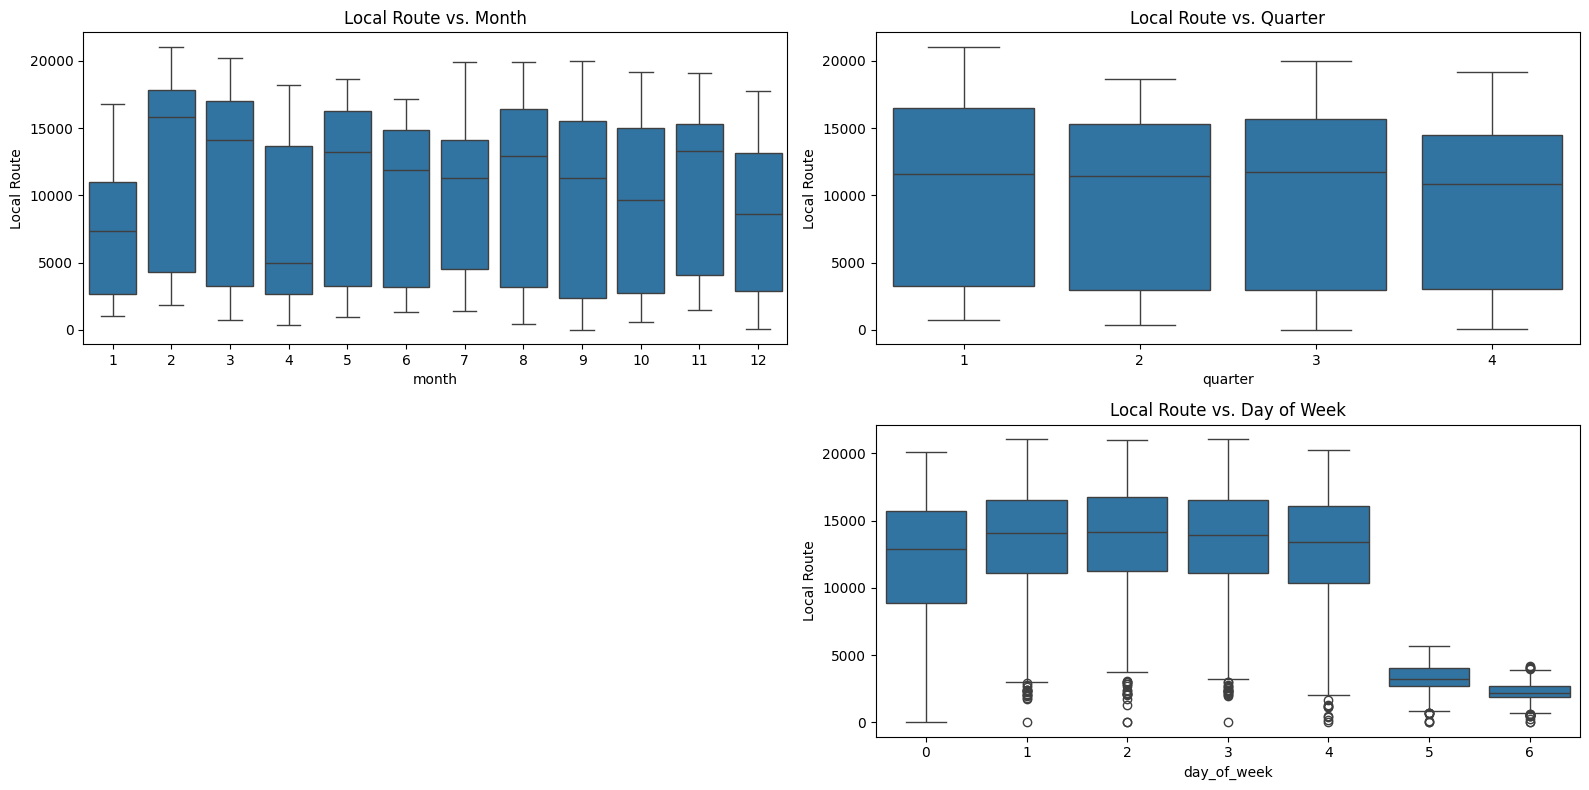

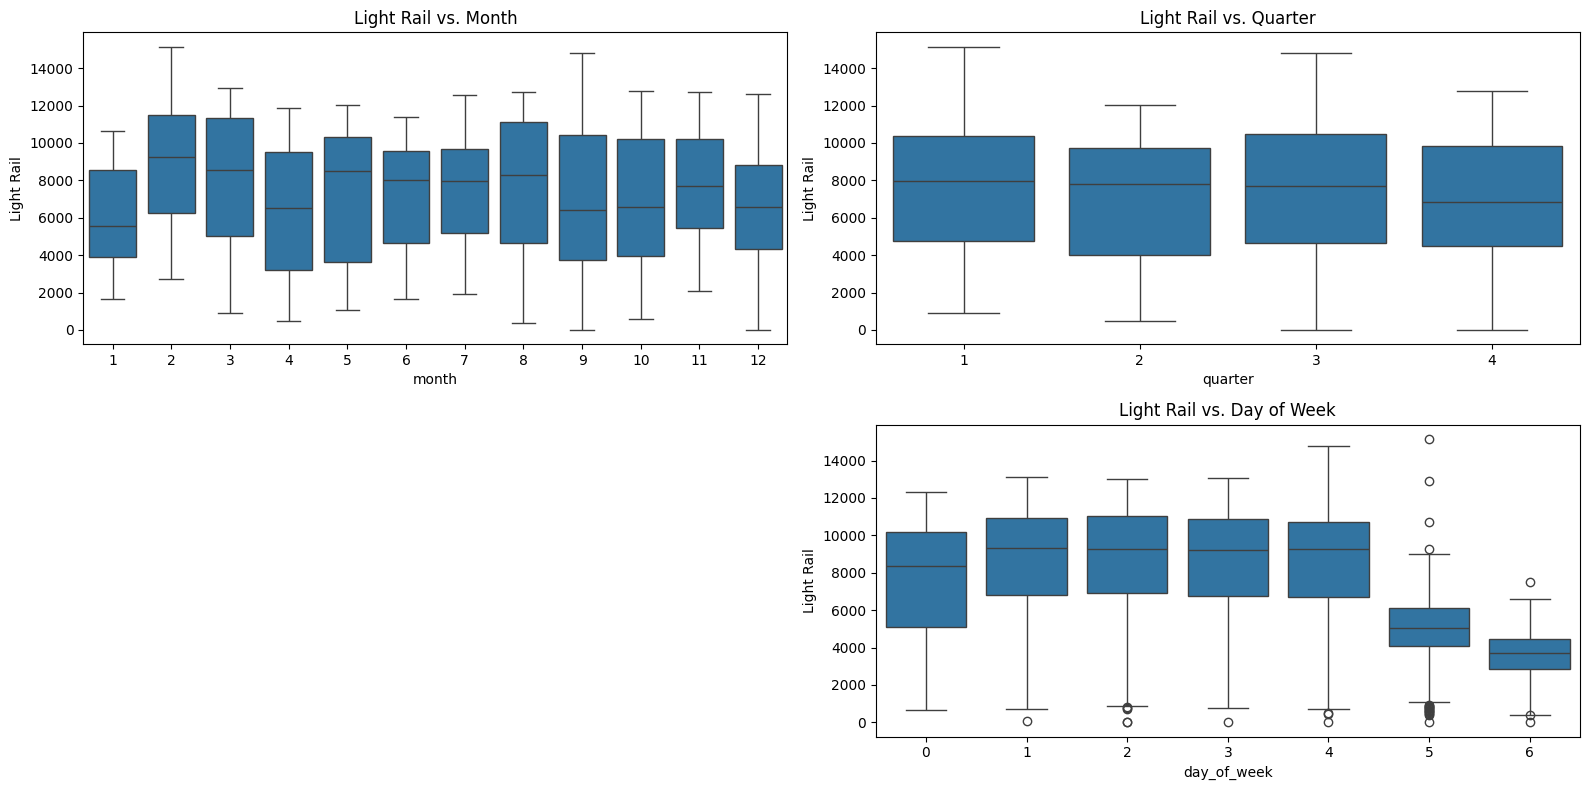

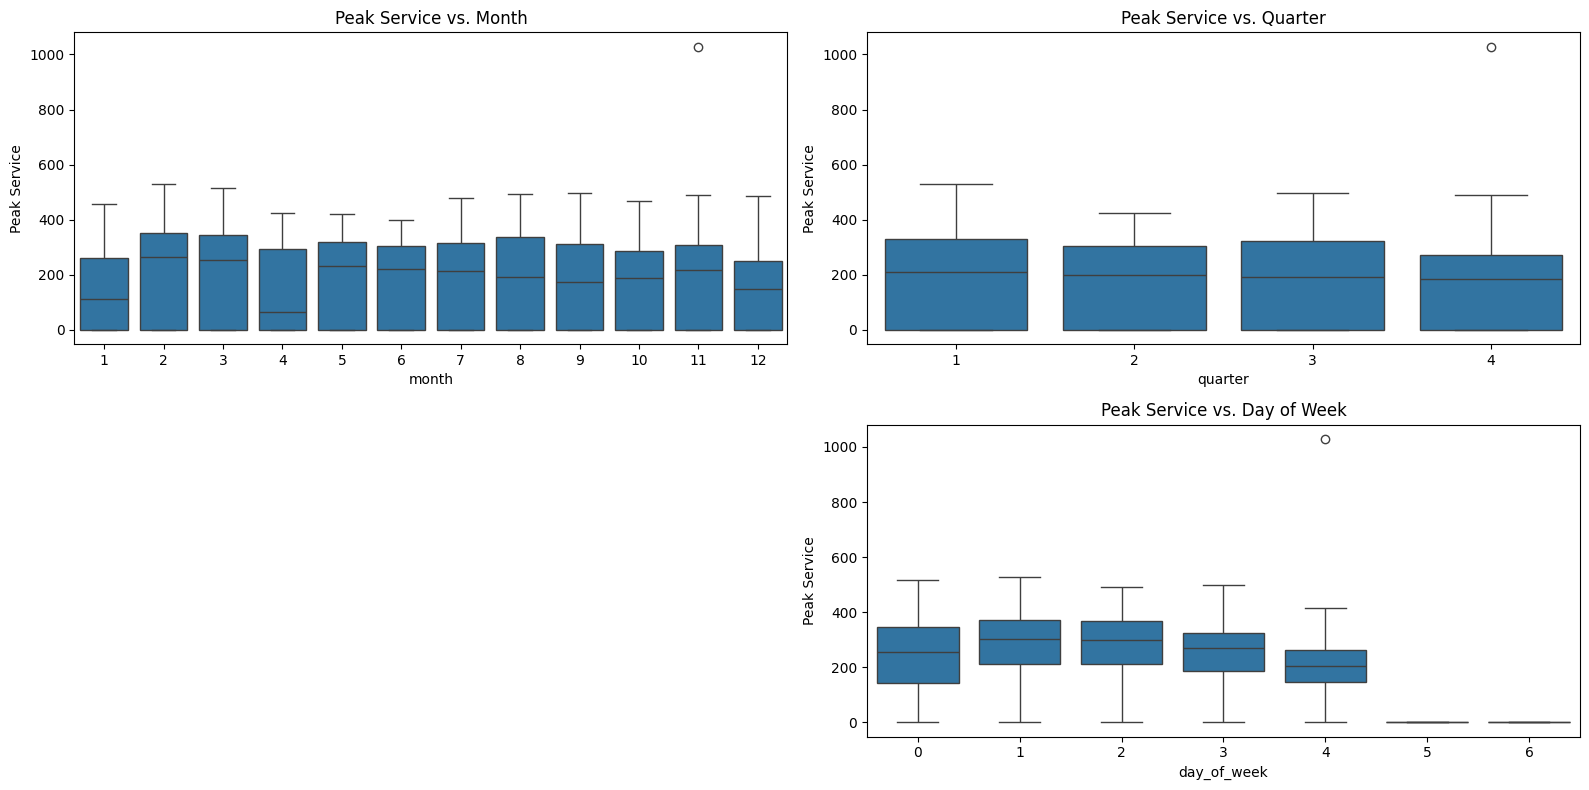

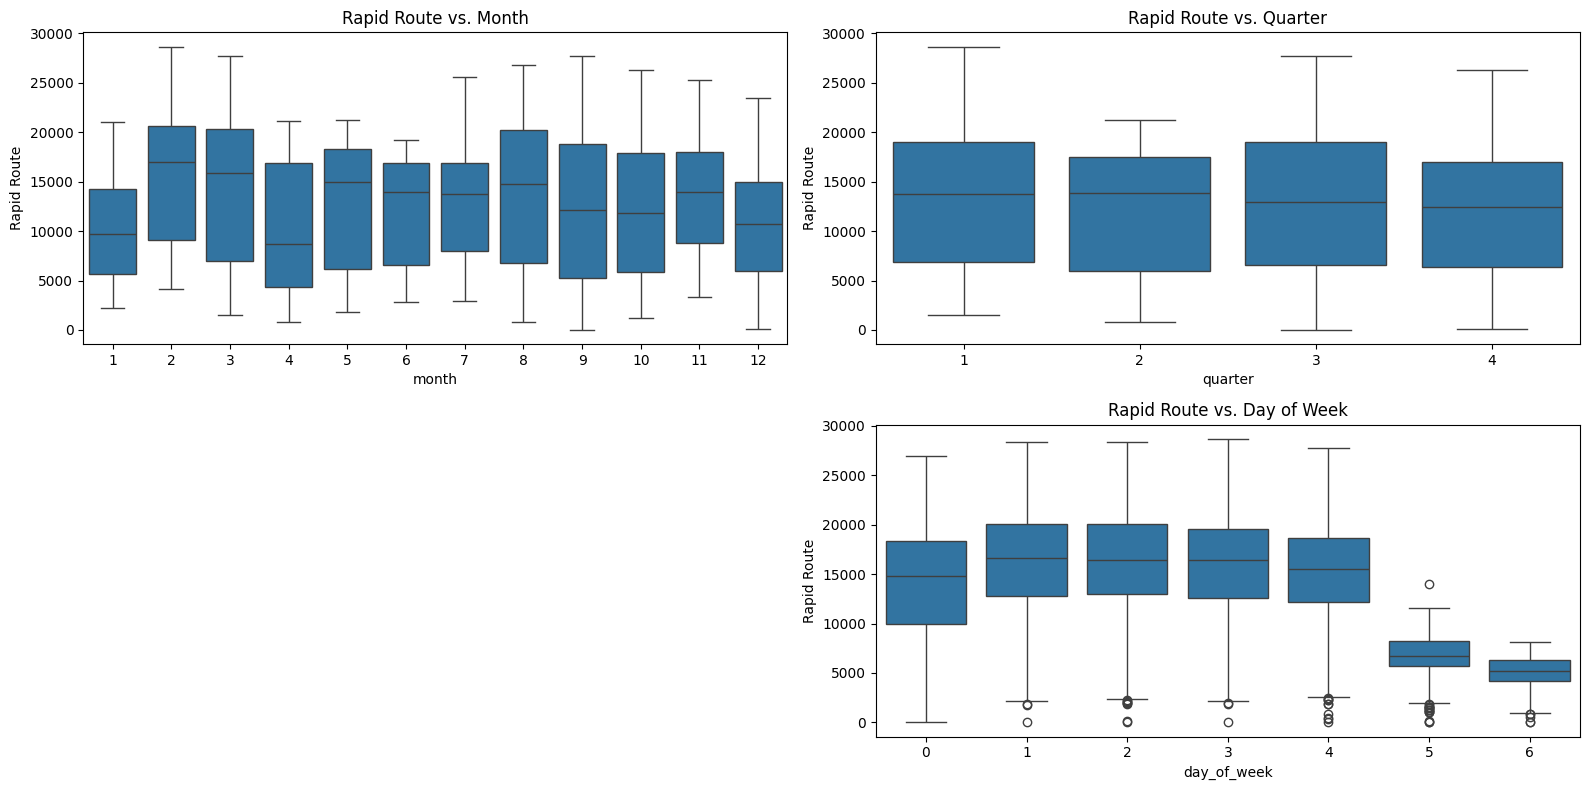

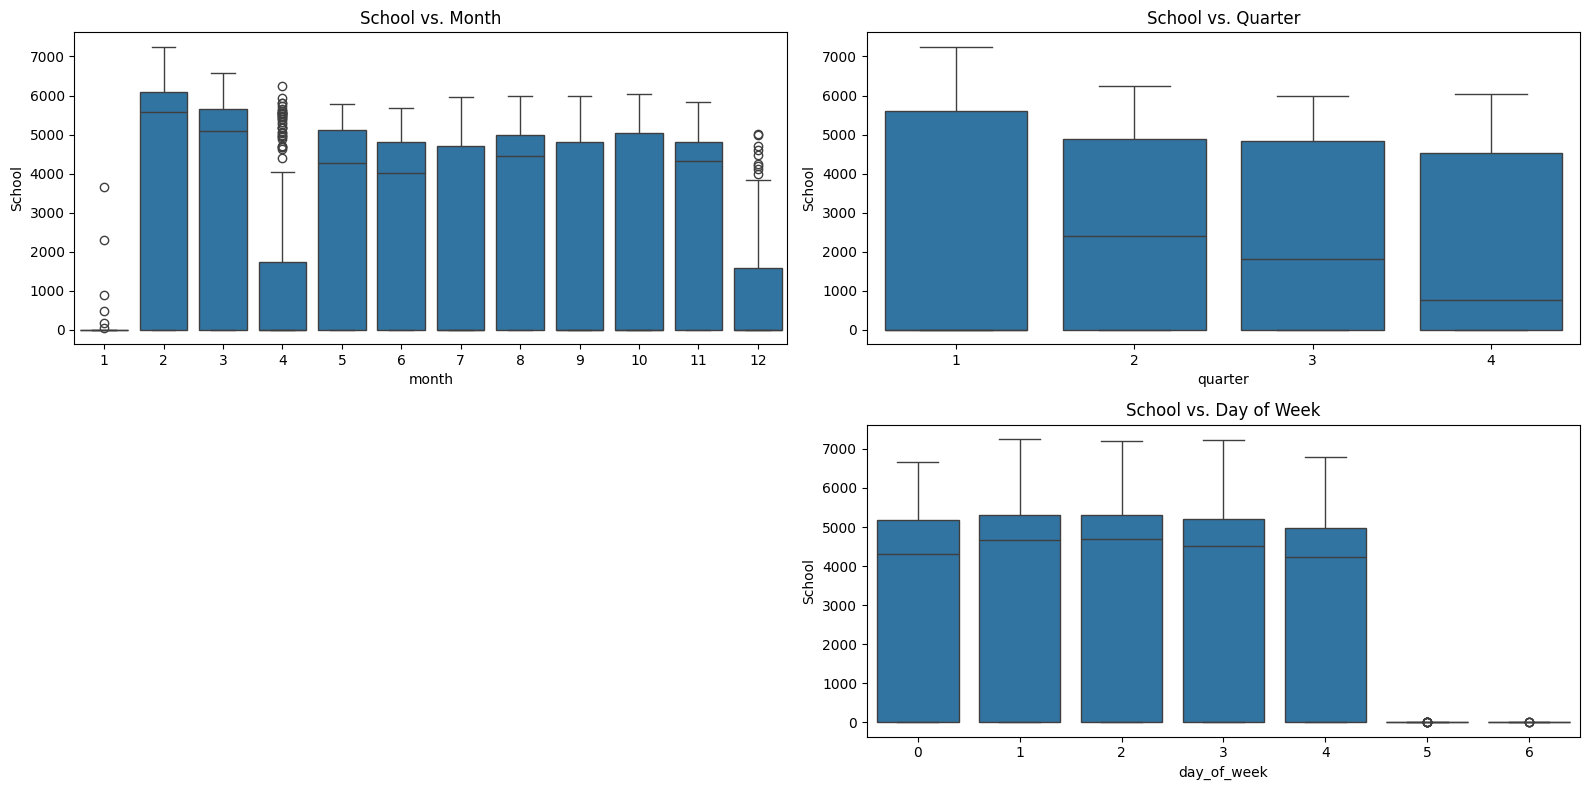

In [57]:
# prompt: generate box plot for Local Route	Light Rail	Peak Service	Rapid Route	School with respect to month,quarter,hour and day of the week

# Boxplot for 'Local Route' with respect to month, quarter, hour, and day of the week
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='month', y='Local Route')
plt.title('Local Route vs. Month')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='quarter', y='Local Route')
plt.title('Local Route vs. Quarter')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='day_of_week', y='Local Route')
plt.title('Local Route vs. Day of Week')

plt.tight_layout()
plt.show()


# Boxplots for other service types
fields = ['Light Rail', 'Peak Service', 'Rapid Route', 'School']

for field in fields:
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x='month', y=field)
    plt.title(f'{field} vs. Month')

    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='quarter', y=field)
    plt.title(f'{field} vs. Quarter')

    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='day_of_week', y=field)
    plt.title(f'{field} vs. Day of Week')

    plt.tight_layout()
    plt.show()

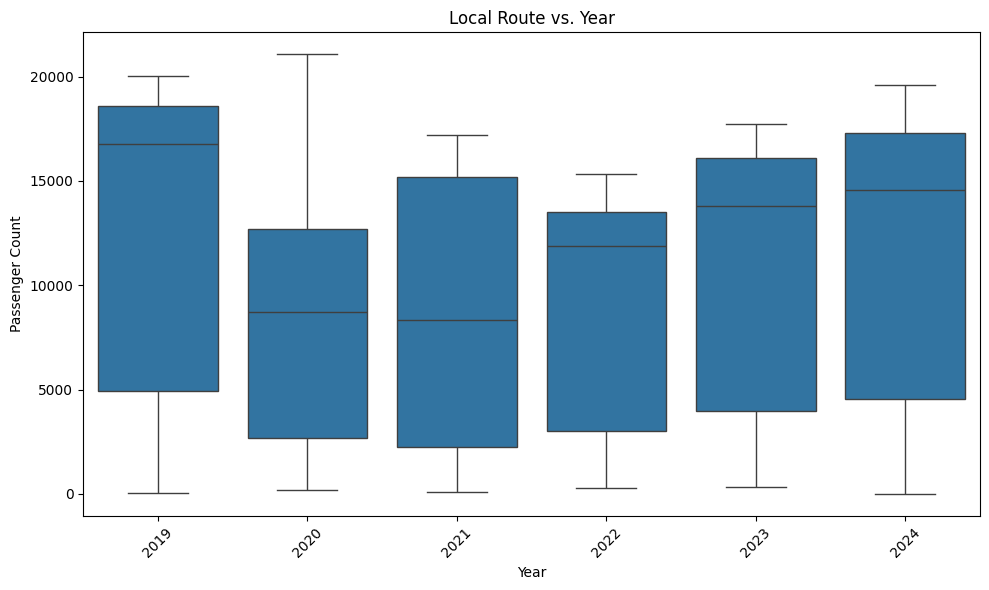

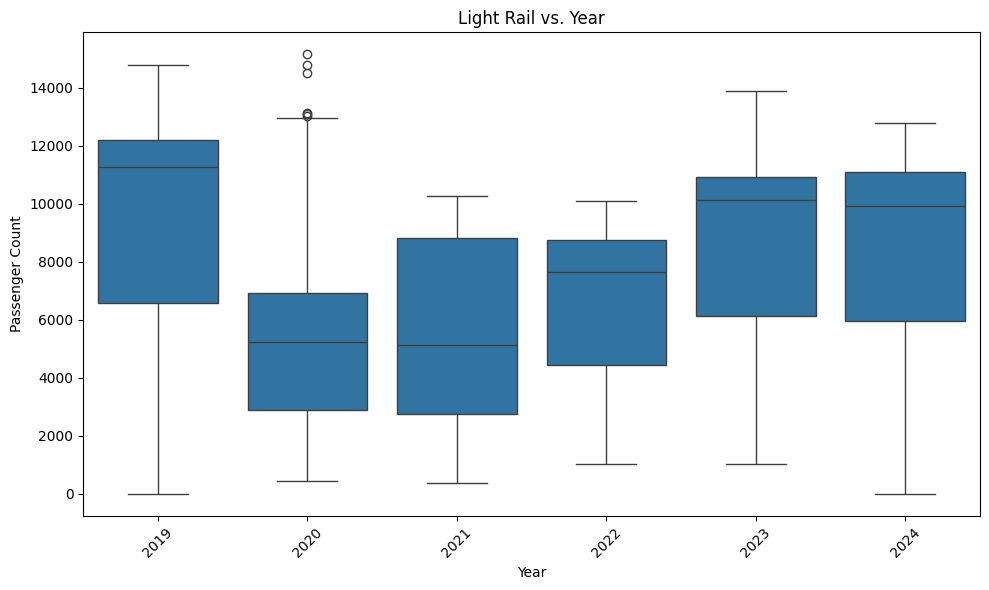

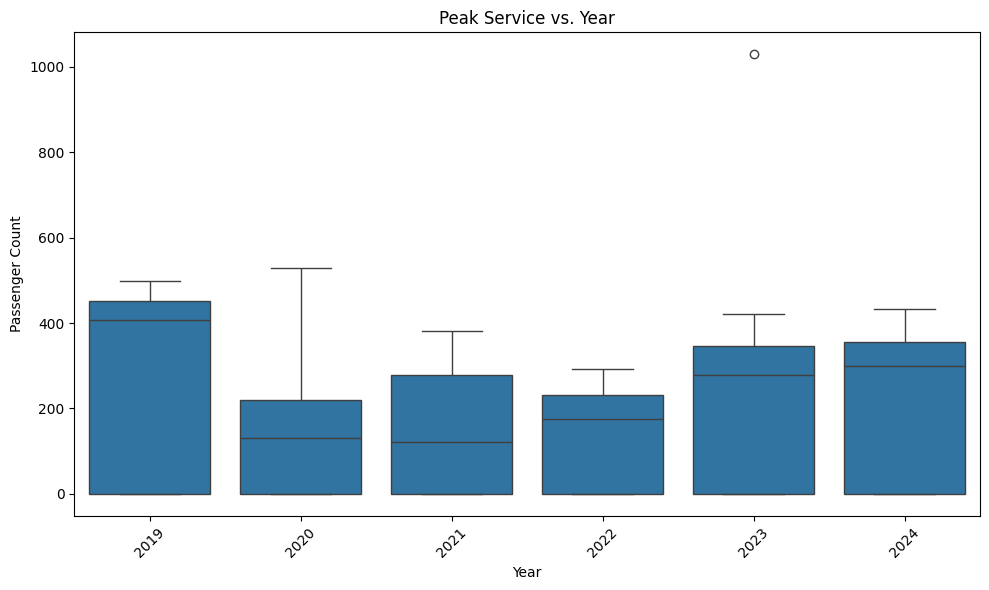

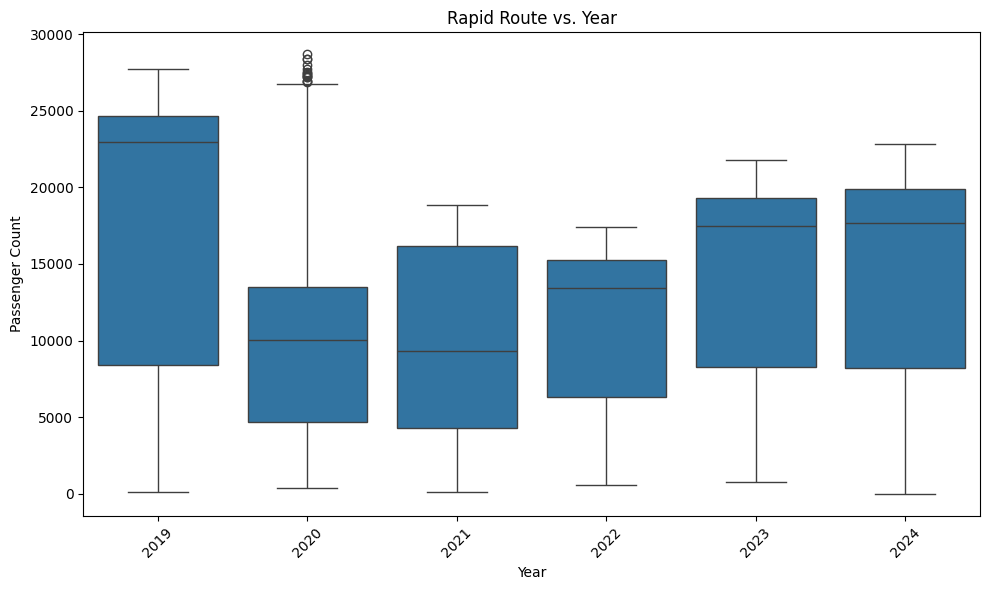

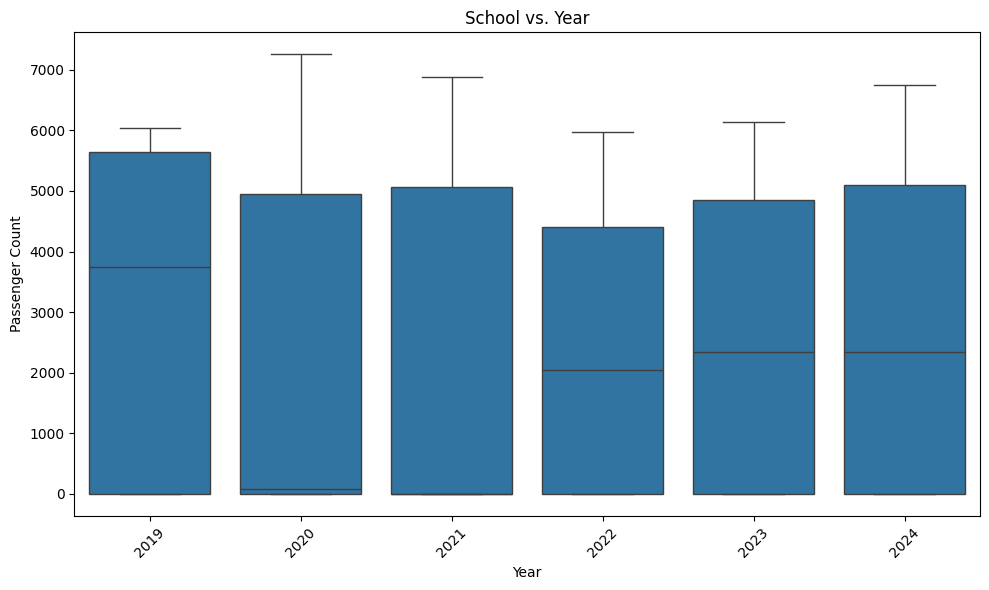

In [58]:
# prompt: create a boxplot for the Local Route,	Light Rail,	Peak Service, Rapid Route and	School with year

# Boxplot for specified service types with respect to year
fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

for field in fields:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.boxplot(data=df, x='year', y=field)
    plt.title(f'{field} vs. Year')
    plt.xlabel('Year')
    plt.ylabel('Passenger Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()
    plt.show()